In [1]:
#Librerías necesarias
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time
import csv
import os
from bs4 import BeautifulSoup
from docx import Document
from sqlalchemy import create_engine

In [2]:
from bs4 import BeautifulSoup
from docx import Document
import pandas as pd

# Ruta del archivo
file_path = r"D:\Documents\Scrapping Sentimientos Project\Project_repository\Docs Mercadolibre\Apple iPhone 15 (128 GB) - Negro $3217900.docx"

# Leer el contenido del documento .docx
doc = Document(file_path)
html_content = "\n".join([paragraph.text for paragraph in doc.paragraphs])

# Analizar el contenido HTML con BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extraer los comentarios
comments = soup.find_all('p', class_='ui-review-capability-comments__comment__content')
extracted_comments = [comment.get_text(strip=True) for comment in comments]

# Extraer las calificaciones
ratings = []
rating_containers = soup.find_all('div', class_='ui-review-capability-comments__comment__rating')
for container in rating_containers:
    stars = len(container.find_all('use', href='#poly_star_fill'))
    ratings.append(stars)

# Crear un DataFrame con los comentarios y las calificaciones
df = pd.DataFrame({'Comments': extracted_comments, 'Rating': ratings})

# Mostrar el DataFrame
print(df)

                                              Comments  Rating
0    El producto es nuevo. Pero es versión china. I...       5
1    Después de un mes de uso constante puedo decir...       5
2    Hasta ahora todo bien. Al menos el modelo que ...       5
3    Es la versión china, totalmente original pero ...       5
4    Fueron muchas dudas y miedo para decidirme a l...       5
..                                                 ...     ...
125  A pesar de que es un dispositivo original y nu...       1
126  Todo iba bien, configure el celular mientras m...       2
127  Al momento de registrar el equipo sale inegi d...       3
128                                             Bueno.       3
129                            No suministran factura.       1

[130 rows x 2 columns]


In [ ]:
###########################  NOTEBOOK JUAN PABLO ##############################

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

from selenium.webdriver.chrome.options import Options

# Configuración para simular un navegador real
chrome_options = Options()

# Evitar ser detectado por automatización
chrome_options.add_argument("--disable-blink-features=AutomationControlled")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--incognito")

# Agregar un user-agent personalizado
chrome_options.add_argument(
    "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.199 Safari/537.36"
)

# Inicializar el driver con las opciones configuradas
driver_path = 'D:\Documents\Scrapping Sentimientos Project\Project_repository\chromedriver.exe'
service = Service(driver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

# URL de la página
url = 'https://www.mercadolibre.com.co/xiaomi-redmi-note-13-pro-4g-dual-sim-256-gb-purpura-8-gb-ram/p/MCO35734320'
driver.get(url)

# Espera inicial para cargar la página
time.sleep(5)

# Haz clic en el botón "Mostrar todas las opiniones" para abrir el modal
try:
    load_more_button = driver.find_element(By.CSS_SELECTOR, 'button.show-more-click[data-testid="see-more"]')
    driver.execute_script("arguments[0].scrollIntoView();", load_more_button)
    time.sleep(1)
    driver.execute_script("arguments[0].click();", load_more_button)  # Haz clic en el botón
    time.sleep(5)  # Ajustar el tiempo si es necesario
    print("Botón 'Mostrar todas las opiniones' clicado.")
except NoSuchElementException:
    print("No se encontró el botón para abrir los comentarios.")
    driver.quit()
    exit()

# Espera a que el modal de comentarios esté completamente cargado
try:
    modal_container = WebDriverWait(driver, 20).until(  # Incrementa el tiempo de espera
        EC.presence_of_element_located((By.CSS_SELECTOR, '.andes-modal__content'))
    )
    print("Modal de comentarios encontrado.")
except TimeoutException:
    print("El modal de comentarios no se cargó a tiempo. Guardando el HTML completo para depuración.")
    # Guardar el HTML completo para inspección
    with open("page_debug.html", "w", encoding="utf-8") as file:
        file.write(driver.page_source)

    driver.quit()
    exit()

# Forzar el scroll dentro del modal
scroll_pause_time = 2  # Tiempo de espera entre cada scroll

try:
    last_height = driver.execute_script("return arguments[0].scrollHeight;", modal_container)
    while True:
        # Ejecuta el scroll hacia el final
        driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight;", modal_container)
        time.sleep(scroll_pause_time)
        
        # Verifica si la altura ya no cambia
        new_height = driver.execute_script("return arguments[0].scrollHeight;", modal_container)
        if new_height == last_height:
            print("Se alcanzó el final del modal.")
            break
        last_height = new_height
except Exception as e:
    print(f"Error durante el scroll: {e}")
    driver.quit()
    exit()

# Extrae los comentarios con BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')
comment_elements = soup.select('p.ui-review-capability-comments__comment__content')  # Selector para comentarios en el modal
comments = [comment.get_text(strip=True) for comment in comment_elements]

# Imprime los comentarios extraídos
if comments:
    for idx, comment in enumerate(comments, 1):
        print(f"Comentario {idx}: {comment}")
else:
    print("No se encontraron comentarios con el selector actual.")

# Guardar los comentarios en un archivo para inspección
with open("comentarios_extraidos.txt", "w", encoding="utf-8") as file:
    for comment in comments:
        file.write(comment + "\n")

# Cierra el navegador
driver.quit()


Botón 'Mostrar todas las opiniones' clicado.
Modal de comentarios encontrado.
Se alcanzó el final del modal.
Comentario 1: Está bueno y funciona bien, esperemos que no salga chimbo, como mi ex.
Comentario 2: Me parece un movil muy bonito, tiene un duracion de bateria excelente.
Comentario 3: Buen equipo, vengo de usar un redmi note 9, y vaya la diferencia, bastante fluido, transiciones suaves, buen espacio, recomendado si no quieres hacer un gasto tan grande y tener buenas prestaciones.


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

from selenium.webdriver.chrome.options import Options

# Configuración para simular un navegador real
chrome_options = Options()

# Evitar ser detectado por automatización
chrome_options.add_argument("--disable-blink-features=AutomationControlled")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--incognito")

# Agregar un user-agent personalizado
chrome_options.add_argument(
    "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.199 Safari/537.36"
)

# Inicializar el driver con las opciones configuradas
driver_path = 'D:\Documents\Scrapping Sentimientos Project\Project_repository\chromedriver.exe'
service = Service(driver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

# URL de la página
url = 'https://www.mercadolibre.com.co/xiaomi-redmi-note-13-pro-4g-dual-sim-256-gb-purpura-8-gb-ram/p/MCO35734320'
driver.get(url)

# Espera inicial para cargar la página
time.sleep(5)

# Haz clic en el botón "Mostrar todas las opiniones" para abrir el modal
try:
    load_more_button = driver.find_element(By.CSS_SELECTOR, 'button.show-more-click[data-testid="see-more"]')
    driver.execute_script("arguments[0].scrollIntoView();", load_more_button)
    time.sleep(1)
    driver.execute_script("arguments[0].click();", load_more_button)  # Haz clic en el botón
    time.sleep(5)  # Ajustar el tiempo si es necesario
    print("Botón 'Mostrar todas las opiniones' clicado.")
except NoSuchElementException:
    print("No se encontró el botón para abrir los comentarios.")
    driver.quit()
    exit()

# Espera a que el contenedor de comentarios esté completamente cargado
try:
    modal_container = WebDriverWait(driver, 20).until(  # Incrementa el tiempo de espera
        EC.presence_of_element_located((By.CSS_SELECTOR, 'section[data-testid="reviews-desktop"].ui-review-capability'))
    )
    print("Contenedor de comentarios encontrado.")
except TimeoutException:
    print("El contenedor de comentarios no se cargó a tiempo. Guardando el HTML completo para depuración.")
    # Guardar el HTML completo para inspección
    with open("page_debug.html", "w", encoding="utf-8") as file:
        file.write(driver.page_source)

    driver.quit()
    exit()

# Forzar el scroll dentro del contenedor
scroll_pause_time = 2  # Tiempo de espera entre cada scroll

try:
    last_height = driver.execute_script("return arguments[0].scrollHeight;", modal_container)
    while True:
        # Ejecuta el scroll hacia el final
        driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight;", modal_container)
        time.sleep(scroll_pause_time)
        
        # Verifica si la altura ya no cambia
        new_height = driver.execute_script("return arguments[0].scrollHeight;", modal_container)
        if new_height == last_height:
            print("Se alcanzó el final del contenedor.")
            break
        last_height = new_height
except Exception as e:
    print(f"Error durante el scroll: {e}")
    driver.quit()
    exit()

# Extrae los comentarios con BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')
comment_elements = soup.select('p.ui-review-capability-comments__comment__content')  # Ajusta el selector si es necesario
comments = [comment.get_text(strip=True) for comment in comment_elements]

# Imprime los comentarios extraídos
if comments:
    for idx, comment in enumerate(comments, 1):
        print(f"Comentario {idx}: {comment}")
else:
    print("No se encontraron comentarios con el selector actual.")

# Guardar los comentarios en un archivo para inspección
with open("comentarios_extraidos.txt", "w", encoding="utf-8") as file:
    for comment in comments:
        file.write(comment + "\n")

# Cierra el navegador
driver.quit()

Botón 'Mostrar todas las opiniones' clicado.
El contenedor de comentarios no se cargó a tiempo. Guardando el HTML completo para depuración.
Error durante el scroll: HTTPConnectionPool(host='localhost', port=52466): Max retries exceeded with url: /session/fabda741f09cb2c0efa549b0ab8af3ac/execute/sync (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000187FB4BBA60>: Failed to establish a new connection: [WinError 10061] No se puede establecer una conexión ya que el equipo de destino denegó expresamente dicha conexión'))


MaxRetryError: HTTPConnectionPool(host='localhost', port=52466): Max retries exceeded with url: /session/fabda741f09cb2c0efa549b0ab8af3ac/source (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000187FB4BBA00>: Failed to establish a new connection: [WinError 10061] No se puede establecer una conexión ya que el equipo de destino denegó expresamente dicha conexión'))

: 

In [1]:
############################ FINAL DE VARIOS DOC WORD ############################33

In [3]:
import os
from bs4 import BeautifulSoup
from docx import Document
import pandas as pd

# Ruta de la carpeta que contiene los documentos
folder_path = r"D:\Documents\Scrapping Sentimientos Project\Project_repository\Webscrapping\Mercadolibre\HTMLs Mercadolibre"

# Lista para almacenar los datos de todos los archivos
all_data = []

# Iterar sobre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith('.docx'):  # Verificar si el archivo es .docx
        file_path = os.path.join(folder_path, filename)

        # Leer el contenido del documento .docx
        doc = Document(file_path)
        html_content = "\n".join([paragraph.text for paragraph in doc.paragraphs])

        # Analizar el contenido HTML con BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extraer los comentarios
        comments = soup.find_all('p', class_='ui-review-capability-comments__comment__content')
        extracted_comments = [comment.get_text(strip=True) for comment in comments]

        # Extraer las calificaciones
        ratings = []
        rating_containers = soup.find_all('div', class_='ui-review-capability-comments__comment__rating')
        for container in rating_containers:
            stars = len(container.find_all('use', href='#poly_star_fill'))
            ratings.append(stars)

        # Asegurar que comentarios y calificaciones tengan el mismo tamaño
        if len(extracted_comments) > len(ratings):
            ratings.extend([None] * (len(extracted_comments) - len(ratings)))
        elif len(ratings) > len(extracted_comments):
            extracted_comments.extend([None] * (len(ratings) - len(extracted_comments)))

        # Agregar los datos al conjunto general
        for comment, rating in zip(extracted_comments, ratings):
            all_data.append({'Filename': filename, 'Comment': comment, 'Rating': rating})

# Crear el DataFrame con el nombre "mercadolibre_reviews"
mercadolibre_reviews = pd.DataFrame(all_data)

# Guardar el DataFrame en un archivo CSV (opcional)
mercadolibre_reviews.to_csv('all_comments_and_ratings.csv', index=False)

# Mostrar el DataFrame
mercadolibre_reviews

,Filename,Comment,Rating
0,Apple iPhone 11 (128 GB) - Negro $1754910.docx,"Es un dispositivo magnifico, se adapta a la ne...",5
1,Apple iPhone 11 (128 GB) - Negro $1754910.docx,"Excelente precio para un equipo tan completo, ...",5
2,Apple iPhone 11 (128 GB) - Negro $1754910.docx,No sabía que llegaba sin cargador.,4
3,Apple iPhone 11 (128 GB) - Negro $1754910.docx,Ha sido excelente este producto. El celular ha...,5
4,Apple iPhone 11 (128 GB) - Negro $1754910.docx,"Buen producto, totalmente nuevo.",5
...,...,...,...
2494,Xiaomi Redmi Note 13 Pro+ 5G Dual SIM 512 GB N...,Es un buen teléfono gama media. Y muy bonito. ...,5
2495,Xiaomi Redmi Note 13 Pro+ 5G Dual SIM 512 GB N...,,5
2496,Xiaomi Redmi Note 13 Pro+ 5G Dual SIM 512 GB N...,Lo compre en el rush de un producto nuevo del ...,5
2497,Xiaomi Redmi Note 13 Pro+ 5G Dual SIM 512 GB N...,"Perfecto , su cámara es muy buena , el diseño ...",5


In [4]:
#Cuenta de comentarios extraidos
# Agrupar por "Filename" y contar los comentarios únicos
grouped_comments = mercadolibre_reviews.groupby('Filename')['Comment'].count()

print(grouped_comments)

Filename
Apple iPhone 11 (128 GB) - Negro $1754910.docx                                         83
Apple iPhone 13 (128 GB) - Azul $2499900.docx                                         180
Apple iPhone 14 (128 GB) - Medianoche $3169000.docx                                    50
Apple iPhone 15 (128 GB) - Negro $3217900.docx                                        130
Samsung A05s 4G Dual SIM 128 GB Negro 6 GB RAM $431433.docx                            90
Samsung Galaxy A15 4G Dual SIM 256 GB azul oscuro 8 GB RAM $599900.docx               173
Samsung Galaxy A25 5G 5G 128 GB azul 6 GB RAM $849900.docx                             71
Samsung Galaxy A35 5g 256 GB Azul oscuro 8 GB RAM $949900.docx                        106
Samsung Galaxy A55 5G Dual SIM 256 GB azul oscuro 8 GB RAM $1387900.docx              210
Samsung Galaxy S23 Ultra (eSIM) 5G Dual SIM 512 GB green 12 GB RAM $4349900.docx      210
Samsung Galaxy S24 Ultra 5G Dual SIM 512 GB titanium black 12 GB RAM $4529900.docx    111
X

In [23]:
###################################### IMPORTAR DATAFRAME DESDE MYSQL #########################################

In [24]:
# Configura los detalles de la conexión
user = 'root'  # Cambia según tu configuración
password = 'Elefantes1507'  # Cambia según tu configuración
host = 'localhost'  # O 127.0.0.1
port = '3306'  # Puerto predeterminado de MySQL
database = 'sentimental_analysis_db'  # Nombre de tu base de datos

# Crear el motor de conexión
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")


# Cargar la tabla completa
df_as = pd.read_sql("SELECT * FROM FILTERED_reviews", con=engine)
df_as

,comentario,calificacion,codigo,Enlace,Sitio Web,Marca,Modelo estandar,Precio
0,Si corresponde a la foto tiene un excelente re...,5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900
1,El tamaño es el apropiado y para cargar fácilm...,5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900
2,"Muy buen producto a un excelente precio, llego...",5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900
3,"Me gusto mucho, y fue rápido la llegada",5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900
4,"Cumple lo que promete, es un lindo celular",5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900
...,...,...,...,...,...,...,...,...
9615,Es un buen teléfono gama media. Y muy bonito. ...,5,MX19,None,mercadolibre,Xiaomi,Xiaomi Redmi Note 13 Pro Plus,1619940
9616,,5,MX19,None,mercadolibre,Xiaomi,Xiaomi Redmi Note 13 Pro Plus,1619940
9617,Lo compre en el rush de un producto nuevo del ...,5,MX19,None,mercadolibre,Xiaomi,Xiaomi Redmi Note 13 Pro Plus,1619940
9618,"Perfecto , su cámara es muy buena , el diseño ...",5,MX19,None,mercadolibre,Xiaomi,Xiaomi Redmi Note 13 Pro Plus,1619940


In [2]:
###################################### IMPORTAR DATAFRAME DESDE CSV #########################################}
df_as = pd.read_csv("../Analisis de Sentimientos/sentiment_analysis.csv")

# Eliminar filas duplicadas basadas en las columnas "comentario" y "Modelo estandar"
df_as = df_as.drop_duplicates(subset=["comentario", "Modelo estandar"], keep=False)

print(df_as.head())

                                           comentario  calificacion codigo  \
0   Si corresponde a la foto tiene un excelente re...             5    FX1   
1   El tamaño es el apropiado y para cargar fácilm...             5    FX1   
2   Muy buen producto a un excelente precio, llego...             5    FX1   
9   Mi experiencia con el Poco X6 Pro 5G ha sido b...             5    FX1   
10  Es un telefono versatil, con muchas opciones d...             5    FX1   

                                               Enlace  Sitio Web   Marca  \
0   https://www.falabella.com.co/falabella-co/prod...  falabella  Xiaomi   
1   https://www.falabella.com.co/falabella-co/prod...  falabella  Xiaomi   
2   https://www.falabella.com.co/falabella-co/prod...  falabella  Xiaomi   
9   https://www.falabella.com.co/falabella-co/prod...  falabella  Xiaomi   
10  https://www.falabella.com.co/falabella-co/prod...  falabella  Xiaomi   

       Modelo estandar   Precio  \
0   Xiaomi Poco X6 Pro  1899900   
1   

In [3]:
# Definir una función para clasificar comentarios como negativos o positivos
def clasificar_comentarios(df):
    df['Comentario_Negativo'] = df['Calificacion Predicha'].apply(lambda x: 1 if x <= 3 else 0)
    df['Comentario_Positivo'] = df['Calificacion Predicha'].apply(lambda x: 1 if x > 3 else 0)
    return df

# Aplicar la clasificación a los datos
df_as = clasificar_comentarios(df_as)

# Agrupar por 'Marca' y 'Modelo estandar' y calcular las métricas
resumen_reviews = df_as.groupby(['Marca', 'Modelo estandar']).agg(
    Comentarios=('Calificacion Predicha', 'size'),   # Contar el número de comentarios
    Calificacion_Promedio=('Calificacion Predicha', 'mean'),  # Calcular promedio de calificaciones
    Precio_Promedio=('Precio', 'mean'),  # Calcular promedio de precios
    Comentarios_Negativos=('Comentario_Negativo', 'sum'),  # Contar comentarios negativos
    Comentarios_Positivos=('Comentario_Positivo', 'sum')  # Contar comentarios positivos
).reset_index()

# Ordenar por el número de comentarios de menor a mayor
resumen_reviews = resumen_reviews.sort_values(by='Comentarios', ascending=True)

# Mostrar el resultado
print(resumen_reviews)

      Marca                Modelo estandar  Comentarios  \
6   Samsung             Samsung Galaxy A35           92   
5   Samsung             Samsung Galaxy A25          183   
4   Samsung             Samsung Galaxy A15          196   
11   Xiaomi           Xiaomi Redmi Note 13          204   
10   Xiaomi               Xiaomi Redmi 13C          222   
3     Apple                      IPhone 15          254   
13   Xiaomi  Xiaomi Redmi Note 13 Pro Plus          266   
9    Xiaomi             Xiaomi Poco X6 Pro          286   
12   Xiaomi       Xiaomi Redmi Note 13 Pro          322   
1     Apple                      IPhone 13          414   
2     Apple                      IPhone 14          485   
0     Apple                      IPhone 11         1035   
8   Samsung              Samsung S24 Ultra         1358   
7   Samsung             Samsung Galaxy A55         1739   

    Calificacion_Promedio  Precio_Promedio  Comentarios_Negativos  \
6                4.467391     9.501174e+05   

In [4]:
# Agrupar por 'Marca' y calcular las métricas
resumen_por_marca = df_as.groupby('Marca').agg(
    Comentarios=('Calificacion Predicha', 'size'),  # Contar el número de comentarios
    Calificacion_Promedio=('Calificacion Predicha', 'mean'),  # Calcular promedio de calificaciones
    Precio_Promedio=('Precio', 'mean'),  # Calcular promedio de precios
    Comentarios_Negativos=('Comentario_Negativo', 'sum'),  # Contar comentarios negativos
    Comentarios_Positivos=('Comentario_Positivo', 'sum')  # Contar comentarios positivos
).reset_index()

# Ordenar por el número de comentarios de menor a mayor
resumen_por_marca = resumen_por_marca.sort_values(by='Comentarios', ascending=True)

# Mostrar el resultado
print(resumen_por_marca)

     Marca  Comentarios  Calificacion_Promedio  Precio_Promedio  \
2   Xiaomi         1300               4.448462     1.112783e+06   
0    Apple         2188               4.612431     2.804201e+06   
1  Samsung         3568               4.601738     4.030044e+06   

   Comentarios_Negativos  Comentarios_Positivos  
2                    157                   1143  
0                    201                   1987  
1                    313                   3255  


In [5]:
###################################### Some Exploratory Data Analysis #########################################

In [6]:
pip install symspellpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from symspellpy.symspellpy import SymSpell, Verbosity
import json
import pandas as pd

In [8]:
# Descargar recursos necesarios de nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Configurar stopwords y lematización
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

# Función para eliminar la frase completa y Diccionario de correcciones específicas
def eliminar_frase(text):
    return text.replace("(Esta reseña se ha recibido a través de una promoción.)", "")
correcciones = {
    "q": "que",
    "exelente": "excelente",
    "espectativas": "expectativas",
    "celu": "celular",
    "bno": "bueno",
    "auriculare": "auriculares",
    "cel": "celular",
    "sultra": "ultra",
    "aprox": "aproximadamente",
    "mobil": "movil",
    "amooo": "amo",
    "perfeccoon": "perfeccion",
    "camras": "camaras",
    "escojer": "escoger",
    "encamta": "encanta",
    "aser": "hacer",
    "calentarce": "calentarse",
    "parese": "parece",
    "nuy": "muy",
    "okey": "okay",
    "espetativas": "expectativas",
    "pq": "por que",
    "mut": "muy",
    "ecxelente": "excelente",
    "execelente": "excelente",
    "bna": "buena",
    "redimiento": "rendimiento",
    "qe": "que",
    "encata": "encanta",
    "sobrecalienta": "calienta",
    "buenardo": "bueno",
    "demaciado": "demasiado",
    "(Esta reseña se ha recibido a través de una promoción.)": "",
}
# Función para aplicar correcciones específicas
def aplicar_correcciones(text):
    tokens = text.split()  # Dividir el texto en palabras
    corrected_tokens = [correcciones.get(token, token) for token in tokens]  # Reemplazar si hay corrección
    return ' '.join(corrected_tokens)  # Volver a unir las palabras


# Stopwords personalizadas
important_negatives = {"no", "nunca", "sin", "muy", "poco", "bastante", "mas", "dos", "mucho"}
stop_words = stop_words - important_negatives

# Función para eliminar tildes sin alterar estructura
def remove_accents(text):
    accents = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U'
    }
    for accented_char, unaccented_char in accents.items():
        text = text.replace(accented_char, unaccented_char)  # Reemplazar cada carácter
    return text


# Función de limpieza completa
def clean_text_with_corrections(text):
    text = eliminar_frase(text)  # Eliminar la frase específica
    text = remove_accents(text)  # Eliminar tildes
    text = aplicar_correcciones(text)  # Aplicar correcciones específicas
    text = re.sub(r'\W', ' ', text)  # Eliminar caracteres no alfanuméricos
    text = re.sub(r'\s+', ' ', text).strip()  # Quitar espacios extra
    text = re.sub(r'\d+', '', text)  # Eliminar números
    tokens = word_tokenize(text.lower())  # Tokenizar
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lematización y filtro
    return ' '.join(tokens)

# Rellenar valores NaN en la columna 'comentario' con una cadena vacía
df_as['comentario'] = df_as['comentario'].fillna('')

# Aplicar al DataFrame
df_as['comentario_limpio'] = df_as['comentario'].apply(clean_text_with_corrections)

# Verificar cambios
print("Primeros comentarios limpios en el DataFrame de prueba:")
print(df_as.head(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Primeros comentarios limpios en el DataFrame de prueba:
                                           comentario  calificacion codigo  \
0   Si corresponde a la foto tiene un excelente re...             5    FX1   
1   El tamaño es el apropiado y para cargar fácilm...             5    FX1   
2   Muy buen producto a un excelente precio, llego...             5    FX1   
9   Mi experiencia con el Poco X6 Pro 5G ha sido b...             5    FX1   
10  Es un telefono versatil, con muchas opciones d...             5    FX1   
11  El celular es de muy buena calidad, rápido, se...             5    FX1   
12                                        Sí perfecto             5    FX1   
13  Un equipo con características premium a precio...             5    FX1   
14  idéntico a la descripción, muy buena batería, ...             5    FX1   
15  Buen celular, pero esperaba más, llegó a tiemp...             4    FX1   

                                               Enlace  Sitio Web   Marca  \
0   https

In [ ]:
###################################### Topic Modeling General (Unsupervised) #########################################

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Usar directamente la columna preprocesada
comentarios = df_as['comentario_limpio'].dropna()

# Crear una matriz de conteo a partir de los comentarios limpios
vectorizer = CountVectorizer(max_features=5000)  # No necesitas definir stopwords aquí, ya están filtradas
X = vectorizer.fit_transform(comentarios)

# Aplicar LDA para el modelado de temas
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Mostrar los temas principales
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Tema {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))  # Top 10 palabras por tema
    print()

Tema 1:
igual producto foto tamaño excelente tal llego color perfecto corresponde

Tema 2:
muy rapido camara bien super telefono bateria movil excelente fotos

Tema 3:
muy excelente calidad buen producto buena precio celular equipo bueno

Tema 4:
no bateria ma si dia dura cargador gama carga sin

Tema 5:
compre no samsung mejor hace me telefono funciones ultra ma



In [10]:
# Obtener todas las marcas únicas
marcas = df_as['Marca'].unique()

# Iterar por cada marca
for marca in marcas:
    print(f"\nTopic Modeling para la marca: {marca}\n")
    
    # Filtrar los comentarios de la marca actual
    comentarios_marca = df_as[df_as['Marca'] == marca]['comentario_limpio'].dropna()
    
    # Crear matriz de conteo
    X_marca = vectorizer.fit_transform(comentarios_marca)
    
    # Aplicar LDA
    lda_marca = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_marca.fit(X_marca)
    
    # Mostrar los temas
    feature_names_marca = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_marca.components_):
        print(f"Tema {topic_idx + 1}:")
        print(" ".join([feature_names_marca[i] for i in topic.argsort()[:-11:-1]]))
    print()


Topic Modeling para la marca: Xiaomi

Tema 1:
muy buena excelente calidad no bateria carga camara precio rapido
Tema 2:
buen excelente no telefono precio muy calidad esperaba exelente equipo
Tema 3:
cumple no excelente expectativas producto uso dia lindo celular bateria
Tema 4:
muy producto buen celular excelente bien buena calidad camara foto
Tema 5:
excelente muy precio no calidad bueno producto relacion bateria cargador


Topic Modeling para la marca: Samsung

Tema 1:
muy telefono camara bien no bateria buena movil gama buen
Tema 2:
compre producto no hace excelente me muy celular buen equipo
Tema 3:
no dia me ma expectativas ningun pantalla and compre llevo
Tema 4:
samsung no ma siempre movil mucho mejor telefono encanta marca
Tema 5:
muy camara excelente buena calidad rapido mejor buen telefono funciones


Topic Modeling para la marca: Apple

Tema 1:
producto excelente muy buen precio entrega calidad compra bueno cumple
Tema 2:
tal descripcion producto momento sin ahora iphone mi

In [11]:
import pandas as pd

# Lista para almacenar los resultados
results = []

# Iterar por cada marca
for marca in marcas:
    comentarios_marca = df_as[df_as['Marca'] == marca]['comentario_limpio'].dropna()
    X_marca = vectorizer.fit_transform(comentarios_marca)
    lda_marca = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_marca.fit(X_marca)
    
    feature_names_marca = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_marca.components_):
        topic_words = " ".join([feature_names_marca[i] for i in topic.argsort()[:-11:-1]])
        results.append({'Marca': marca, 'Tema': topic_idx + 1, 'Palabras clave': topic_words})

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results)

# Mostrar el DataFrame
print(df_results)

      Marca  Tema                                     Palabras clave
0    Xiaomi     1  muy buena excelente calidad no bateria carga c...
1    Xiaomi     2  buen excelente no telefono precio muy calidad ...
2    Xiaomi     3  cumple no excelente expectativas producto uso ...
3    Xiaomi     4  muy producto buen celular excelente bien buena...
4    Xiaomi     5  excelente muy precio no calidad bueno producto...
5   Samsung     1  muy telefono camara bien no bateria buena movi...
6   Samsung     2  compre producto no hace excelente me muy celul...
7   Samsung     3  no dia me ma expectativas ningun pantalla and ...
8   Samsung     4  samsung no ma siempre movil mucho mejor telefo...
9   Samsung     5  muy camara excelente buena calidad rapido mejo...
10    Apple     1  producto excelente muy buen precio entrega cal...
11    Apple     2  tal descripcion producto momento sin ahora iph...
12    Apple     3  perfecto no rapido tamaño super original color...
13    Apple     4  no iphone apple

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Filtrar comentarios negativos (calificación <= 3)
comentarios_negativos = df_as[df_as['calificacion'] <= 3]

# Obtener todas las marcas únicas
marcas = comentarios_negativos['Marca'].unique()

# Configurar el vectorizador
vectorizer = CountVectorizer(max_df=0.95, min_df=2)  # Sin stopwords adicionales

# Iterar por cada marca
for marca in marcas:
    print(f"\nTopic Modeling para la marca: {marca} (Comentarios Negativos)\n")
    
    # Filtrar los comentarios de la marca actual
    comentarios_marca = comentarios_negativos[comentarios_negativos['Marca'] == marca]['comentario_limpio'].dropna()
    
    # Verificar si hay suficientes comentarios
    if len(comentarios_marca) < 5:  # Evitar análisis si hay pocos comentarios
        print(f"No hay suficientes comentarios negativos para {marca}.")
        continue
    
    # Crear matriz de conteo
    X_marca = vectorizer.fit_transform(comentarios_marca)
    
    # Aplicar LDA
    lda_marca = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_marca.fit(X_marca)
    
    # Mostrar los temas
    feature_names_marca = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_marca.components_):
        print(f"Tema {topic_idx + 1}:")
        print(" ".join([feature_names_marca[i] for i in topic.argsort()[:-11:-1]]))
    print()


Topic Modeling para la marca: Xiaomi (Comentarios Negativos)

Tema 1:
no producto muy bateria carga celular bueno dura rapido bloquea
Tema 2:
garantia muy malo me dia despues bateria bueno solo carga
Tema 3:
queda cambio pantalla inicie configuracion colores solo general celular sin
Tema 4:
no cargador si equipo bien fotos bateria calidad dura sirve
Tema 5:
no telefono dia calidad ma equipo garantia bateria buena recomiendo


Topic Modeling para la marca: Samsung (Comentarios Negativos)

Tema 1:
bueno pantalla producto tactil mejor muy equipo momentos cumple sin
Tema 2:
no dispositivo trae pantalla muy poco cargador bateria me camara
Tema 3:
bateria bien llamadas no cargador precio mejor recalienta sin daño
Tema 4:
no compre muy hace dia samsung celular sin producto bateria
Tema 5:
no carga bateria calienta mucho dia equipo rapido telefono dura


Topic Modeling para la marca: Apple (Comentarios Negativos)

Tema 1:
no equipo excelente entrega original producto sim momento tenia pantall

In [13]:
################ Modelado de Temas Supervisado

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Definir los temas y las palabras clave asociadas
temas = {
    "Cámara": [
        "cámara", "fotos", "fotografía", "imagen", "frontal", "lente", "video", "calibracion",
        "fotografías", "grabación", "resolución", "selfie", "zoom", "ángulo", "nitidez", "flash",
        "exposición", "detalle", "foco", "capturar", "enfoca"
    ],
    "Batería": [
        "batería", "carga", "cargador", "dura", "energía", "duración", "cargar", 
        "inalámbrica", "powerbank", "sobrecarga", "sobrecalentamiento", "voltaje", "descarga", "rendimiento de batería"
    ],
    "Precio": [
        "precio", "caro", "barato", "costo", "económico", "inversión", "vale", "asequible", 
        "promoción", "oferta", "calidad-precio", "rebaja", "alto costo", "accesible", "cuesta"
        "dinero", "valor", "precio alto", "precio bajo", "gasto", "compensación"
    ],
    "Rendimiento": [
        "traba", "buggea", "ram", "queda pegado", "congelado", "corre", "recalienta muy rapido", "Google", "facebook", "redes sociales",
        "rendimiento", "rápido", "fluido", "lento", "procesador", "eficiencia", "memoria", #"recalienta", 
        "potencia", "velocidad", "multitarea", "procesos", "aplicaciones",
        "juegos", "optimización", "frecuencia", "capacidad", "retraso", "lag", "software"
    ],
    "Pantalla": [
        "pantalla", "tamaño", "brillo", "visualización", "display","imagenes", "tactil",
        "OLED", "LCD", "AMOLED", "táctil", "refresco", 
        "frecuencia"
    ]
}

# Crear una función para asignar temas a cada comentario
def asignar_tema(comentario, temas):
    comentario_temas = []
    for tema, palabras_clave in temas.items():
        if any(palabra in comentario for palabra in palabras_clave):
            comentario_temas.append(tema)
    return comentario_temas

# Asignar temas a cada comentario en la columna 'comentario_limpio'
df_as['Temas'] = df_as['comentario_limpio'].apply(lambda x: asignar_tema(x, temas))

# Expandir los temas en filas separadas para un análisis más fácil
df_tematicos = df_as.explode('Temas')

# Calcular métricas por tema y marca
resultados = df_tematicos.groupby(['Marca', 'Temas']).agg(
    Total_Comentarios=('comentario', 'count'),
    Calificacion_Promedio=('Calificacion Predicha', 'mean')
).reset_index()

# Ordenar los resultados por marca y tema
resultados = resultados.sort_values(['Marca', 'Temas'])

# Mostrar los resultados
print(resultados)

      Marca        Temas  Total_Comentarios  Calificacion_Promedio
0     Apple      Batería                110               4.145455
1     Apple       Cámara                668               4.911677
2     Apple     Pantalla                307               4.570033
3     Apple       Precio                183               4.699454
4     Apple  Rendimiento                252               4.571429
5   Samsung      Batería                390               4.182051
6   Samsung       Cámara               1059               4.758263
7   Samsung     Pantalla                396               4.502525
8   Samsung       Precio                360               4.541667
9   Samsung  Rendimiento                714               4.584034
10   Xiaomi      Batería                204               4.000000
11   Xiaomi       Cámara                476               4.758403
12   Xiaomi     Pantalla                118               4.161017
13   Xiaomi       Precio                290               4.57

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19856\1217502819.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19856\1217502819.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas))


Gráfico para Comentarios Positivos


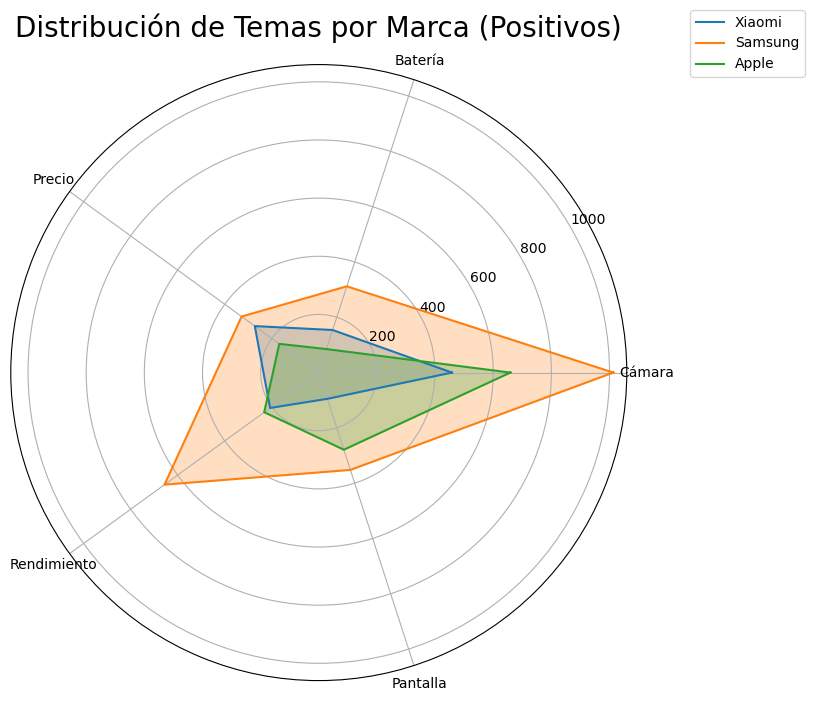

Gráfico para Comentarios Negativos


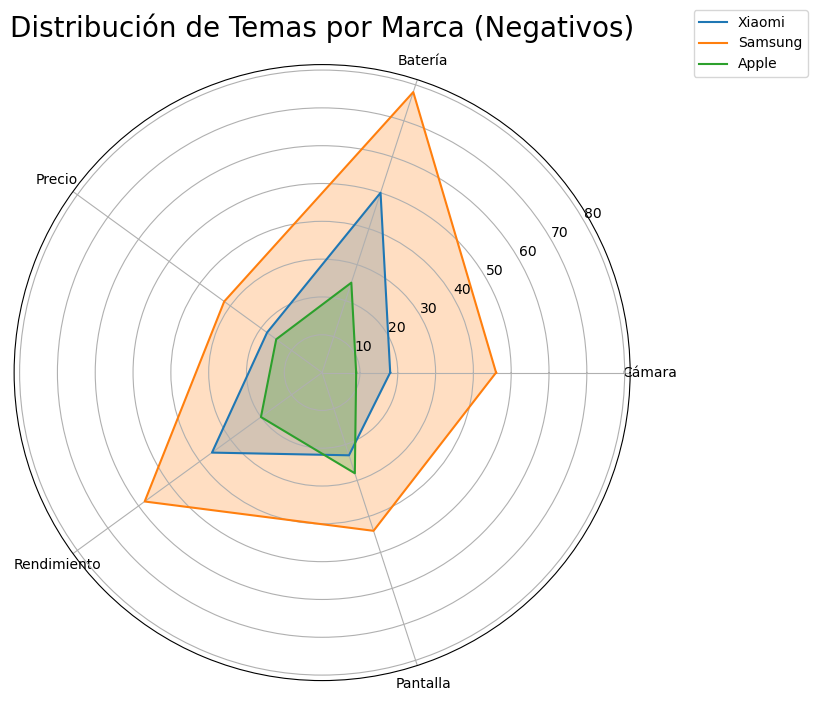

In [15]:
# Dividir el DataFrame en positivos y negativos
positivos = df_as[df_as['Calificacion Predicha'] > 3]
negativos = df_as[df_as['Calificacion Predicha'] <= 3]

# Función para calcular el conteo de temas por marca
def calcular_temas_por_marca(df, temas):
    # Asignar temas a cada comentario
    df['Temas'] = df['comentario_limpio'].apply(lambda x: asignar_tema(x, temas))
    
    # Expandir los temas en filas separadas
    df_tematicos = df.explode('Temas')
    
    # Calcular el total de comentarios por tema y marca
    resultados = df_tematicos.groupby(['Marca', 'Temas']).size().reset_index(name='Total_Comentarios')
    return resultados

# Calcular temas por marca para positivos y negativos
temas_positivos = calcular_temas_por_marca(positivos, temas)
temas_negativos = calcular_temas_por_marca(negativos, temas)

# Función para preparar los datos para gráficos de araña
def preparar_datos_radar(resultados, marcas, temas):
    radar_data = {}
    for marca in marcas:
        marca_data = resultados[resultados['Marca'] == marca]
        valores = []
        for tema in temas.keys():
            total = marca_data[marca_data['Temas'] == tema]['Total_Comentarios'].sum()
            valores.append(total)
        radar_data[marca] = valores
    return radar_data

# Obtener marcas únicas
marcas = df_as['Marca'].unique()

# Preparar los datos para gráficos
radar_positivos = preparar_datos_radar(temas_positivos, marcas, temas)
radar_negativos = preparar_datos_radar(temas_negativos, marcas, temas)

# Función para graficar radar charts
def graficar_radar(data, temas, titulo):
    categorias = list(temas.keys())
    N = len(categorias)

    # Ángulo de cada eje
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Cerrar el círculo

    # Crear subgráficos
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for marca, valores in data.items():
        valores += valores[:1]  # Cerrar el círculo
        ax.plot(angles, valores, label=marca)
        ax.fill(angles, valores, alpha=0.25)

    # Configuración del gráfico
    ax.set_title(titulo, size=20, pad=20)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categorias)
    ax.set_rlabel_position(30)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.show()

# Graficar radar charts
print("Gráfico para Comentarios Positivos")
graficar_radar(radar_positivos, temas, "Distribución de Temas por Marca (Positivos)")

print("Gráfico para Comentarios Negativos")
graficar_radar(radar_negativos, temas, "Distribución de Temas por Marca (Negativos)")

Gráfico Normalizado para Comentarios Positivos


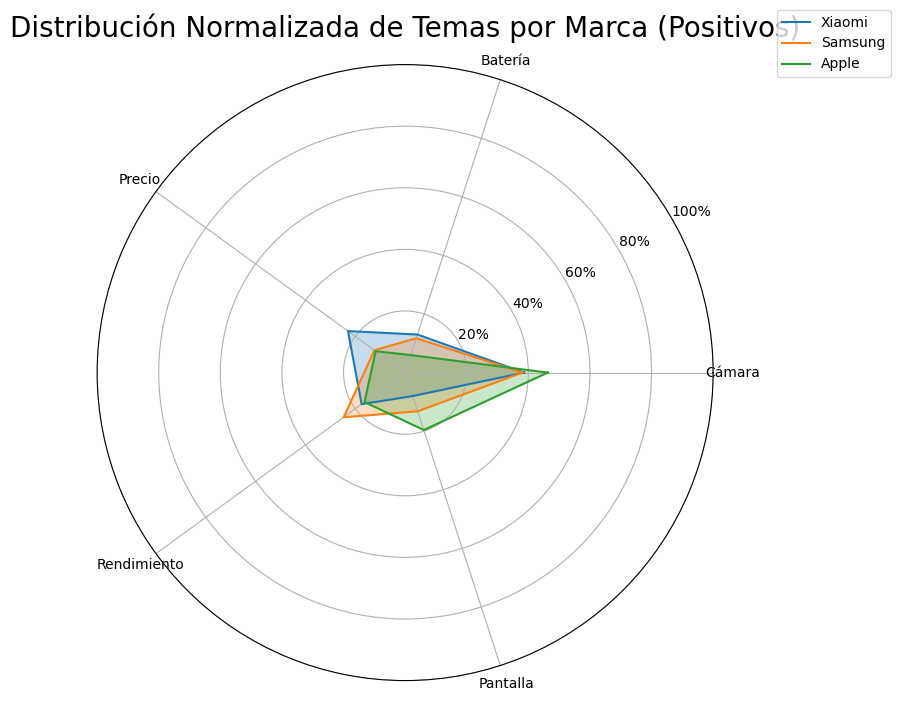

Gráfico Normalizado para Comentarios Negativos


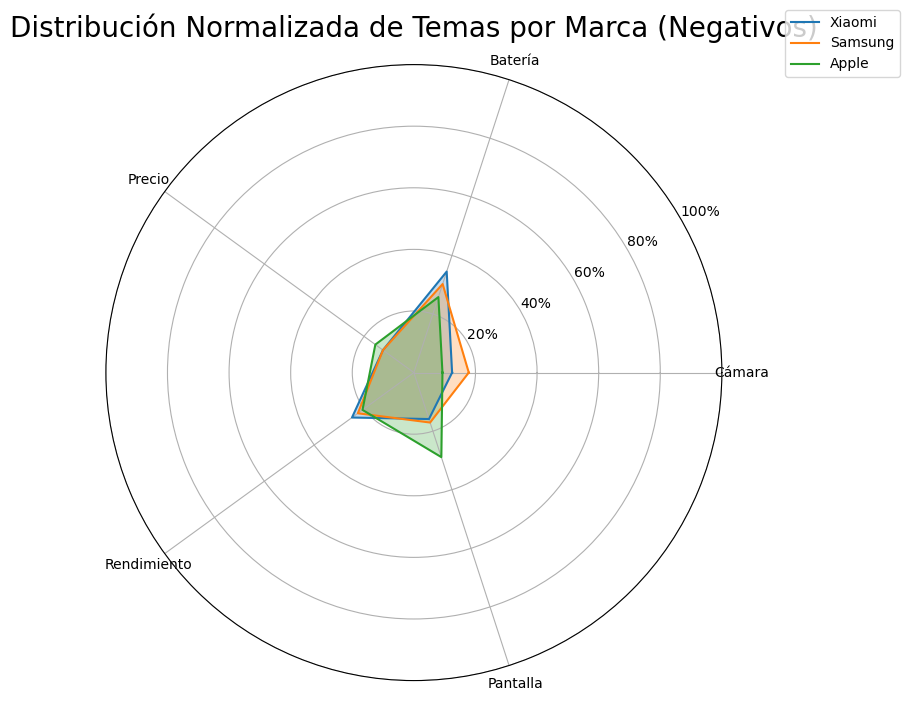

In [16]:
# Función para preparar los datos normalizados para gráficos de radar
def preparar_datos_radar_normalizado(resultados, marcas, temas):
    radar_data = {}
    for marca in marcas:
        marca_data = resultados[resultados['Marca'] == marca]
        total_comentarios = marca_data['Total_Comentarios'].sum()  # Total de comentarios de la marca
        valores = []
        for tema in temas.keys():
            total = marca_data[marca_data['Temas'] == tema]['Total_Comentarios'].sum()
            porcentaje = (total / total_comentarios) * 100 if total_comentarios > 0 else 0  # Normalizar
            valores.append(porcentaje)
        radar_data[marca] = valores
    return radar_data

# Preparar los datos normalizados para gráficos
radar_positivos_normalizado = preparar_datos_radar_normalizado(temas_positivos, marcas, temas)
radar_negativos_normalizado = preparar_datos_radar_normalizado(temas_negativos, marcas, temas)

# Función para graficar radar charts normalizados
def graficar_radar_normalizado(data, temas, titulo):
    categorias = list(temas.keys())
    N = len(categorias)

    # Ángulo de cada eje
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Cerrar el círculo

    # Crear subgráficos
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for marca, valores in data.items():
        valores += valores[:1]  # Cerrar el círculo
        ax.plot(angles, valores, label=marca)
        ax.fill(angles, valores, alpha=0.25)

    # Configuración del gráfico
    ax.set_title(titulo, size=20, pad=20)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categorias)
    ax.set_rlabel_position(30)
    ax.set_yticks([20, 40, 60, 80, 100])  # Límites de porcentaje
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"])
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.show()

# Graficar radar charts normalizados
print("Gráfico Normalizado para Comentarios Positivos")
graficar_radar_normalizado(radar_positivos_normalizado, temas, "Distribución Normalizada de Temas por Marca (Positivos)")

print("Gráfico Normalizado para Comentarios Negativos")
graficar_radar_normalizado(radar_negativos_normalizado, temas, "Distribución Normalizada de Temas por Marca (Negativos)")

Gráfico Escalado para Comentarios Positivos


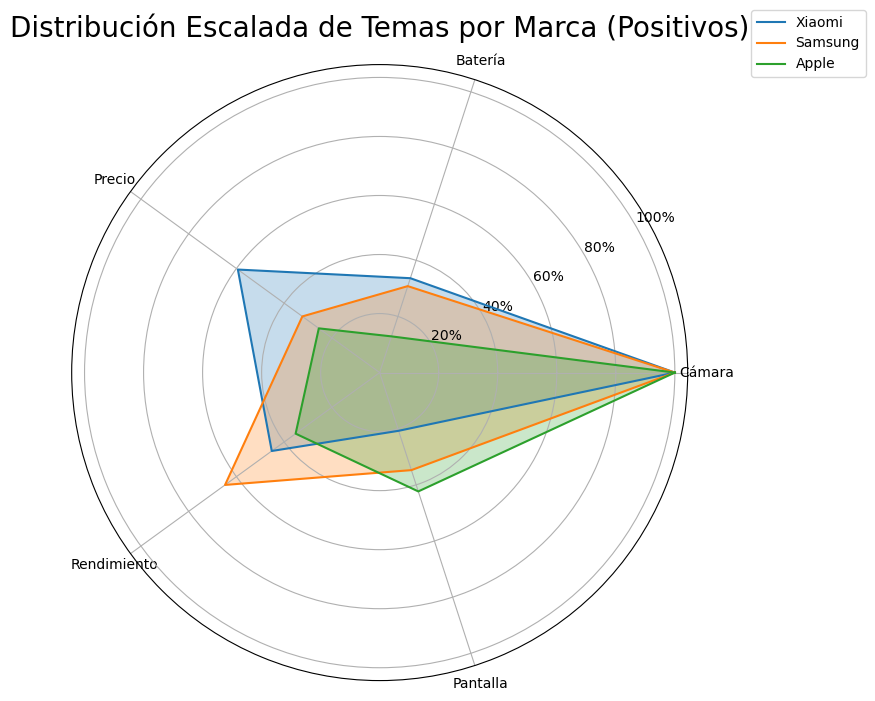

Gráfico Escalado para Comentarios Negativos


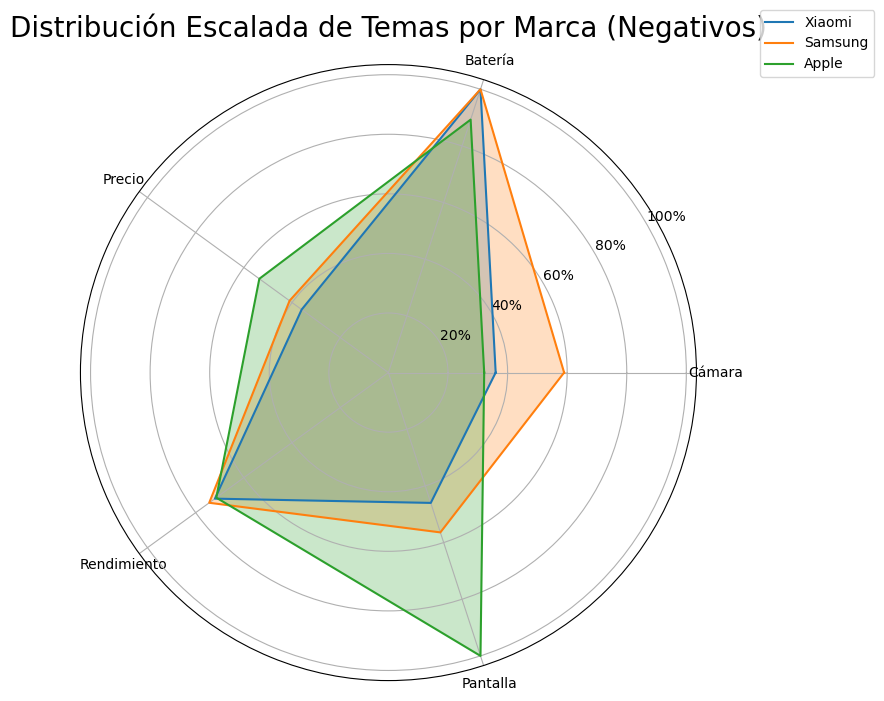

In [17]:
# Función para preparar los datos escalados para gráficos de radar
def preparar_datos_radar_escalado(resultados, marcas, temas):
    radar_data = {}
    for marca in marcas:
        marca_data = resultados[resultados['Marca'] == marca]
        valores = []
        for tema in temas.keys():
            total = marca_data[marca_data['Temas'] == tema]['Total_Comentarios'].sum()
            valores.append(total)

        # Escalar valores para que el máximo sea 100
        max_valor = max(valores) if valores else 1
        valores = [(v / max_valor) * 100 for v in valores]
        radar_data[marca] = valores
    return radar_data

# Preparar los datos escalados para gráficos
radar_positivos_escalado = preparar_datos_radar_escalado(temas_positivos, marcas, temas)
radar_negativos_escalado = preparar_datos_radar_escalado(temas_negativos, marcas, temas)

# Función para graficar radar charts normalizados
def graficar_radar_normalizado(data, temas, titulo):
    categorias = list(temas.keys())
    N = len(categorias)

    # Ángulo de cada eje
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Cerrar el círculo

    # Crear subgráficos
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for marca, valores in data.items():
        valores += valores[:1]  # Cerrar el círculo
        ax.plot(angles, valores, label=marca)
        ax.fill(angles, valores, alpha=0.25)

    # Configuración del gráfico
    ax.set_title(titulo, size=20, pad=20)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categorias)
    ax.set_rlabel_position(30)
    ax.set_yticks([20, 40, 60, 80, 100])  # Límites de porcentaje
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"])
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.show()

# Graficar radar charts escalados
print("Gráfico Escalado para Comentarios Positivos")
graficar_radar_normalizado(radar_positivos_escalado, temas, "Distribución Escalada de Temas por Marca (Positivos)")

print("Gráfico Escalado para Comentarios Negativos")
graficar_radar_normalizado(radar_negativos_escalado, temas, "Distribución Escalada de Temas por Marca (Negativos)")

In [18]:
df_as

,comentario,calificacion,codigo,Enlace,Sitio Web,Marca,Modelo estandar,Precio,comentario_limpio,comentario_limpio_sin_lematizar,Calificacion Predicha,Sentimiento,Comentario_Negativo,Comentario_Positivo,Temas
0,Si corresponde a la foto tiene un excelente re...,5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900,si corresponde foto excelente rendimiento capa...,Si corresponde a la foto tiene un excelente re...,5,Positivo,0,1,"[Cámara, Rendimiento]"
1,El tamaño es el apropiado y para cargar fácilm...,5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900,tamaño apropiado cargar facilmente calidad ima...,El tamaño es el apropiado y para cargar facilm...,4,Positivo,0,1,"[Cámara, Batería, Rendimiento, Pantalla]"
2,"Muy buen producto a un excelente precio, llego...",5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900,muy buen producto excelente precio llego rapid...,Muy buen producto a un excelente precio llego ...,5,Positivo,0,1,"[Cámara, Precio]"
9,Mi experiencia con el Poco X6 Pro 5G ha sido b...,5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900,experiencia poco x pro g sido bastante positiv...,Mi experiencia con el Poco X Pro G ha sido bas...,5,Positivo,0,1,"[Batería, Rendimiento, Pantalla]"
10,"Es un telefono versatil, con muchas opciones d...",5,FX1,https://www.falabella.com.co/falabella-co/prod...,falabella,Xiaomi,Xiaomi Poco X6 Pro,1899900,telefono versatil muchas opciones personalizac...,Es un telefono versatil con muchas opciones de...,4,Positivo,0,1,[Rendimiento]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9614,"Exelente celular, relación precio calidad inme...",5,MX19,NaN,mercadolibre,Xiaomi,Xiaomi Redmi Note 13 Pro Plus,1619940,exelente celular relacion precio calidad inmej...,Exelente celular relacion precio calidad inmej...,5,Positivo,0,1,"[Cámara, Precio]"
9615,Es un buen teléfono gama media. Y muy bonito. ...,5,MX19,NaN,mercadolibre,Xiaomi,Xiaomi Redmi Note 13 Pro Plus,1619940,buen telefono gama medium muy bonito muy recom...,Es un buen telefono gama media Y muy bonito Mu...,5,Positivo,0,1,[]
9617,Lo compre en el rush de un producto nuevo del ...,5,MX19,NaN,mercadolibre,Xiaomi,Xiaomi Redmi Note 13 Pro Plus,1619940,compre rush producto nuevo muchas persona qued...,Lo compre en el rush de un producto nuevo del ...,5,Positivo,0,1,[Precio]
9618,"Perfecto , su cámara es muy buena , el diseño ...",5,MX19,NaN,mercadolibre,Xiaomi,Xiaomi Redmi Note 13 Pro Plus,1619940,perfecto camara muy buena diseño muy elegante ...,Perfecto su camara es muy buena el diseño es m...,4,Positivo,0,1,"[Rendimiento, Pantalla]"
